# Erasmus Neural Networks
http://michalbereta.pl/nn

## CIFAR10


## Before you start

Exacute the examples.

Then, do the tasks and send back the notebook.

Change the name of this notebook according to the schema: {YourSurname}\_{YourFirstName}\_{OriginalFileName}.

Be sure to fill all places with "YOUR ANSWER HERE".

When ready, send the notebook, with all the necessary files zipped, to the teacher.

### CIFAR10 dataset

More info:  https://www.cs.toronto.edu/~kriz/cifar.html

Download:  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

Extract the archive to your folder.

## Some utility functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

def load_batch(path):
    with open(path, 'rb') as f:
        d = pickle.load(f, encoding='bytes')
    return d

def get_cifar10_train(path):
    temp = load_batch(path+'\\'+'data_batch_1')
    data = temp[b'data']
    labels = np.array(temp[b'labels'])
    temp = load_batch(path+'\\'+'data_batch_2')
    data = np.vstack((data,temp[b'data']))
    labels = np.append(labels, temp[b'labels'])
    temp = load_batch(path+'\\'+'data_batch_3')
    data = np.vstack((data,temp[b'data']))
    labels = np.append(labels, temp[b'labels'])
    temp = load_batch(path+'\\'+'data_batch_4')
    data = np.vstack((data,temp[b'data']))
    labels = np.append(labels, temp[b'labels'])
    temp = load_batch(path+'\\'+'data_batch_5')
    data = np.vstack((data,temp[b'data']))
    labels = np.append(labels, temp[b'labels'])    
    return data, labels

def get_cifar10_test(path):
    temp = load_batch(path+'\\'+'test_batch')
    data = temp[b'data']
    labels = np.array(temp[b'labels'])
    return data, labels

## Read sample images from CIFAR10

(50000, 3072)
uint8
(50000,)
int32
(10000, 3072)
uint8
(10000,)
int32
(3072,)
(32, 32, 3)


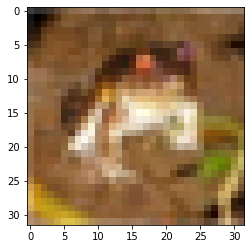

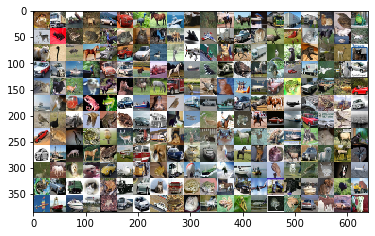

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

X, labels = get_cifar10_train('cifar-10-batches-py')
print(X.shape)
print(X.dtype)
print(labels.shape)
print(labels.dtype)

Xte, labelste = get_cifar10_test('cifar-10-batches-py')
print(Xte.shape)
print(Xte.dtype)
print(labelste.shape)
print(labelste.dtype)

##display the first of the train images
im = X[0,:] 
print(im.shape)
im = np.dstack((im[:1024].reshape((32,32)),im[1024:2048].reshape((32,32)),im[2048:].reshape((32,32))))
print(im.shape)
#print(im)
plt.imshow(im)



#generate a display of several first images
rows = 12
cols = 20
counter = 0

images = None

for i in range(rows):
    current_row = None
    for j in range(cols):
        im = X[counter,:]
        im = np.dstack((im[:1024].reshape((32,32)),im[1024:2048].reshape((32,32)),im[2048:].reshape((32,32))))
        counter = counter + 1
        if current_row is None:
            current_row = im
        else:
            current_row = np.hstack((current_row, im))
    if images is None:
        images = current_row
    else:
        images = np.vstack((images, current_row))
        
plt.figure()
plt.imshow(images)

plt.show()

## Example training with linear SoftMax

reading train data...
(50000, 3072)
float64
(50000,)
int32
reading test data...
(10000, 3072)
float64
(10000,)
int32
dloss: 2.3028299897833384
erate: 0.90236
errors: 45118
test dloss: 2.3037072172712016
test erate: 0.9032
test errors: 9032

starting learning...

iteration 1
dloss: 2.3026183444232777
erate: 0.9017
errors: 45085
test dloss: 2.303499967556681
test erate: 0.9032
test errors: 9032

iteration 2
dloss: 2.3024089311386318
erate: 0.90132
errors: 45066
test dloss: 2.3032949328341883
test erate: 0.9022
test errors: 9022

iteration 3
dloss: 2.3022017095929805
erate: 0.90084
errors: 45042
test dloss: 2.3030920726785005
test erate: 0.9013
test errors: 9013

iteration 4
dloss: 2.301996640279476
erate: 0.90056
errors: 45028
test dloss: 2.3028913474999
test erate: 0.9007
test errors: 9007

iteration 5
dloss: 2.301793684501058
erate: 0.90048
errors: 45024
test dloss: 2.302692718524204
test erate: 0.8992
test errors: 8992

iteration 6
dloss: 2.3015928043512264
erate: 0.89988
errors: 4499


iteration 60
dloss: 2.293020347574021
erate: 0.88636
errors: 44318
test dloss: 2.2941301155863782
test erate: 0.8856
test errors: 8856

iteration 61
dloss: 2.2928922960099634
erate: 0.88642
errors: 44321
test dloss: 2.2940054115388904
test erate: 0.8857
test errors: 8857

iteration 62
dloss: 2.292765044537478
erate: 0.88646
errors: 44323
test dloss: 2.293881491199396
test erate: 0.8858
test errors: 8858

iteration 63
dloss: 2.2926385803673095
erate: 0.8863
errors: 44315
test dloss: 2.2937583418425165
test erate: 0.8851
test errors: 8851

iteration 64
dloss: 2.292512890936269
erate: 0.88622
errors: 44311
test dloss: 2.293635950969569
test erate: 0.885
test errors: 8850

iteration 65
dloss: 2.2923879639028377
erate: 0.88598
errors: 44299
test dloss: 2.293514306304141
test erate: 0.885
test errors: 8850

iteration 66
dloss: 2.292263787142862
erate: 0.88592
errors: 44296
test dloss: 2.293393395787762
test erate: 0.8845
test errors: 8845

iteration 67
dloss: 2.292140348745349
erate: 0.8856

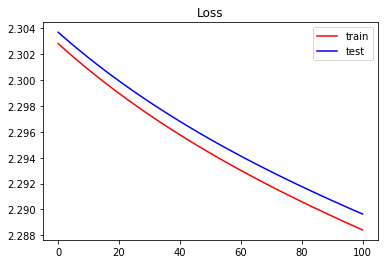

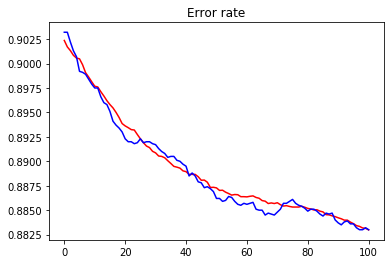

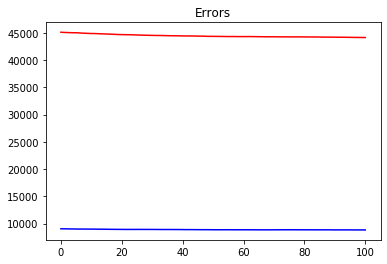

In [6]:
import numpy as np
import matplotlib.pyplot as plt


class SoftMaxLinear:
    def __init__(self, inputs_num, outputs_num):
        self.inum = inputs_num
        self.onum = outputs_num
        self.W = (-1 + 2*np.random.rand(inputs_num, outputs_num))/100.0 #neurons as columns
        self.b = np.zeros((1, outputs_num)) #horizontal vector
        self.probs = None
    def Forward(self, X): #examples as rows in X
        f = np.dot(X, self.W) + self.b
        f -= np.max(f, axis=1, keepdims=True) #trick for numerical stability
        probs = np.exp(f)
        probs /= np.sum(probs, axis=1, keepdims=True)
        self.probs = probs
    def Test(self, X, ClsIndx):
        self.Forward(X)
        #data loss: mean cross-entropy loss
        ex_num = X.shape[0]
        data_loss = -np.log(self.probs[range(ex_num),ClsIndx]).sum()/ex_num
        #classification error
        predictions = np.argmax(self.probs, axis=1)
        errors_num = np.sum(predictions != ClsIndx)
        error_rate = errors_num / ex_num
        return (data_loss, error_rate, errors_num)
    def GetProbs(self):
        return self.probs
    def GetPredictions(self):
        return np.argmax(self.probs, axis=1)
    def Learn(self, X, ClsIndx, lrate):
        self.Forward(X)
        #gradients of outputs (class probabilities)
        ex_num = X.shape[0]
        dprobs = self.probs.copy()
        dprobs[range(ex_num), ClsIndx] -= 1.0
        dprobs /= ex_num #average over all examples
        #gradient of weights and biases
        dW = np.dot(X.T, dprobs) # chain rule to calculate gradients
        db = np.sum(dprobs, axis=0,keepdims=True)
        #update neurons
        self.W = self.W - lrate*dW
        self.b = self.b - lrate*db
       
        
        


#train data
print('reading train data...')
X, labels = get_cifar10_train('cifar-10-batches-py')
X = X/255.0 #simple normalization
print(X.shape)
print(X.dtype)
print(labels.shape)
print(labels.dtype)

#test data
print('reading test data...')
Xte, labelste = get_cifar10_test('cifar-10-batches-py')
Xte = Xte/255.0 #simple normalization
print(Xte.shape)
print(Xte.dtype)
print(labelste.shape)
print(labelste.dtype)



net = SoftMaxLinear(3072, 10) #num of inputs = num of pixels; num of outputs = num of classes

#learning statistics
trloss = []
teloss = []
trerate = []
teerate = []
trerrors = []
teerrors = []

#checking the answers before training
(dloss, erate, errors) = net.Test(X, labels)
print('dloss:',dloss)
print('erate:',erate)
print('errors:',errors)
trloss.append(dloss)
trerate.append(erate)
trerrors.append(errors)

(dloss, erate, errors) = net.Test(Xte, labelste)
print('test dloss:',dloss)
print('test erate:',erate)
print('test errors:',errors)
teloss.append(dloss)
teerate.append(erate)
teerrors.append(errors)

print()

print('starting learning...')
counter = 1
max_iters = 100
min_loss = 0.1
while True:
    net.Learn(X, labels, 0.0001)
    (dloss, erate, errors) = net.Test(X, labels)
    print('\niteration', counter)
    print('dloss:',dloss)
    print('erate:',erate)
    print('errors:',errors)
    trloss.append(dloss)
    trerate.append(erate)
    trerrors.append(errors)
    #checking test data
    (dloss, erate, errors) = net.Test(Xte, labelste)
    print('test dloss:',dloss)
    print('test erate:',erate)
    print('test errors:',errors)
    teloss.append(dloss)
    teerate.append(erate)
    teerrors.append(errors)    
    counter += 1
    if dloss < min_loss:
        break
    if counter > max_iters:
        break
print('learning finished')

#save
import pickle
f = open('my_softmax_cifar10.net','wb')
pickle.dump(net, f)
f.close()

print('Minimum training error rate: ', min(trerate),' for iteration ',np.argmin(trerate))
print('Minimum testing error rate: ', min(teerate),' for iteration ',np.argmin(teerate))

plt.figure()
plt.plot(trloss, 'r', label='train')
plt.plot(teloss, 'b', label='test')
plt.title('Loss')
plt.legend()

plt.figure()
plt.plot(trerate, 'r', label='train')
plt.plot(teerate, 'b', label='test')
plt.title('Error rate')

plt.figure()
plt.plot(trerrors, 'r', label='train')
plt.plot(teerrors, 'b', label='test')
plt.title('Errors')

plt.show()


## Task 1

- Use MLP and SoftMax with hidden layer(s) to train on CIFAR10, and check how much you can improve over linear SoftMax.

- Does regularization help to improve the test results?

- Prepare a report presenting your results. Send a pdf file with the report. Attach the source codes. Do not attach the databases.

- Send also the saved trained classifiers – check pickle_example to see how to save objects (your nets). Prepare the code to load the saved network and check the test results.